# FloPy

### Zonbud Example 1

This notebook demonstrates how to use the functions included in the zonbud utility to extract budget information from the cell by cell budget file using an array of zones.

First set the path and import the required packages. The flopy path doesn't have to be set if you install flopy from a binary installer. If you want to run this notebook, you have to set the path to your own flopy path.

In [1]:
%matplotlib inline
from __future__ import print_function
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, r'E:\local_repo\flopy_dev\flopy')
import flopy
from flopy.utils import ZoneBudget

# Set path to example datafiles
zbudpath = os.path.join('..', 'data', 'zonbud_examples')

### Create a ZoneBudget Object and Make Some Zones

We create a simple numpy integer-array to define some zones for which we are interested in getting cell-by-cell budget information.

In [2]:
# Create ZoneBudget object
cbc_file = os.path.join(zbudpath, 'freyberg.gitcbc')
zb = ZoneBudget(cbc_file)
print(zb.get_ssst_names())

['CONSTANT HEAD', 'WELLS', 'RIVER LEAKAGE', 'RECHARGE']


In [3]:
print(zb.get_kstpkper())

[(0, 0)]


In [4]:
%%timeit
ZoneBudget(cbc_file)

1000 loops, best of 3: 1.62 ms per loop


In [5]:
# We can get the shape of the model from the ZoneBudget object
zb.get_model_shape()

(1L, 40L, 20L)

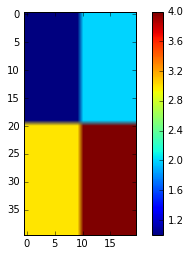

In [6]:
# Define some very interesting zones
nlay, nrow, ncol = zb.get_model_shape()
zon = np.zeros((nlay, nrow, ncol), np.int32)
zon[0, :nrow/2, :ncol/2] = 1
zon[0, :nrow/2, ncol/2:] = 2
zon[0, nrow/2:, :ncol/2] = 3
zon[0, nrow/2:, ncol/2:] = 4

im = plt.imshow(zon[0, :, :])
cbar = plt.colorbar(im)

### Extract Budget Information from ZoneBudget Object

We use the `get_budget()` method of the ZoneBudget object to return a Budget object, which is a thin wrapper around a numpy record array. The Budget object can be used to write the budget to a csv file. Let's look at the dtype:

In [7]:
bud = zb.get_budget(zon, kstpkper=(0, 0))
print(np.unique(zon))
print(bud.records.dtype)

[1 2 3 4]
[('flow_dir', 'S3'), ('record', 'S20'), ('ZONE 1', '<f4'), ('ZONE 2', '<f4'), ('ZONE 3', '<f4'), ('ZONE 4', '<f4')]


In [8]:
print(bud.records)

[('in', 'CONSTANT HEAD', 0.0, 0.0, 0.0, 0.0)
 ('in', 'WELLS', 0.0, 0.0, 0.0, 0.0)
 ('in', 'RIVER LEAKAGE', 0.0, 0.004194190260022879, 0.0, 0.0)
 ('in', 'RECHARGE', 0.01530000101774931, 0.020000001415610313, 0.01590000092983246, 0.018300000578165054)
 ('in', 'FROM ZONE 1', 0.0, 0.013101870194077492, 0.0028348490595817566, 0.0)
 ('in', 'FROM ZONE 2', 0.0, 0.0, 0.0, 0.0012257143389433622)
 ('in', 'FROM ZONE 3', 0.0006367169553413987, 0.0, 0.0, 0.013000612147152424)
 ('in', 'FROM ZONE 4', 0.0, 0.0011461640242487192, 0.0, 0.0)
 ('out', 'CONSTANT HEAD', 0.0, 0.0, 0.0, 0.0)
 ('out', 'WELLS', 0.0, 0.016199998557567596, 0.0015499999281018972, 0.00430000014603138)
 ('out', 'RIVER LEAKAGE', 0.0, 0.021016843616962433, 0.0, 0.025892717763781548)
 ('out', 'RECHARGE', 0.0, 0.0, 0.0, 0.0)
 ('out', 'TO ZONE 1', 0.0, 0.0, 0.0006367169553413987, 0.0)
 ('out', 'TO ZONE 2', 0.013101870194077492, 0.0, 0.0, 0.0011461640242487192)
 ('out', 'TO ZONE 3', 0.0028348490595817566, 0.0, 0.0, 0.0)
 ('out', 'TO ZONE 4

In [9]:
print(bud.get_total_inflow())
print(bud.get_total_outflow())
print(bud.get_percent_error())

[ 0.01593672  0.03844223  0.01873485  0.03252633]
[ 0.01593672  0.03844256  0.01518733  0.03133888]
[-1.1687759e-05, -0.00085277093, 20.915644, 3.7185936]


In [10]:
%%timeit
zb.get_budget(zon, kstpkper=(0, 0))

100 loops, best of 3: 8.16 ms per loop


In [11]:
# Look at just the inflow terms:
print(bud.records[bud.records['flow_dir']=='in'])

[('in', 'CONSTANT HEAD', 0.0, 0.0, 0.0, 0.0)
 ('in', 'WELLS', 0.0, 0.0, 0.0, 0.0)
 ('in', 'RIVER LEAKAGE', 0.0, 0.004194190260022879, 0.0, 0.0)
 ('in', 'RECHARGE', 0.01530000101774931, 0.020000001415610313, 0.01590000092983246, 0.018300000578165054)
 ('in', 'FROM ZONE 1', 0.0, 0.013101870194077492, 0.0028348490595817566, 0.0)
 ('in', 'FROM ZONE 2', 0.0, 0.0, 0.0, 0.0012257143389433622)
 ('in', 'FROM ZONE 3', 0.0006367169553413987, 0.0, 0.0, 0.013000612147152424)
 ('in', 'FROM ZONE 4', 0.0, 0.0011461640242487192, 0.0, 0.0)]


In [12]:
# Look at just the recharge record
print(bud.records[bud.records['record']=='RECHARGE'])

[ ('in', 'RECHARGE', 0.01530000101774931, 0.020000001415610313, 0.01590000092983246, 0.018300000578165054)
 ('out', 'RECHARGE', 0.0, 0.0, 0.0, 0.0)]


In [13]:
# Look at outflow from zone 1
z1_outflow = bud.records['ZONE 1'][bud.records['flow_dir'] == 'out']
print(z1_outflow)
print('Total Outflow from Zone 1 (kstpkper=(0, 0)): {out:.5f}'.format(out=z1_outflow.sum()*-1))

[ 0.          0.          0.          0.          0.          0.01310187
  0.00283485  0.        ]
Total Outflow from Zone 1 (kstpkper=(0, 0)): -0.01594


In [14]:
# View the budget as a Pandas DataFrame
import pandas as pd
df = pd.DataFrame.from_records(bud.records)
df = df.set_index(['flow_dir', 'record']).sort_index()  # sort multi-index so we can slice it later
df

ZONE 1    ZONE 2    ZONE 3    ZONE 4
flow_dir record                                               
in       CONSTANT HEAD  0.000000  0.000000  0.000000  0.000000
         FROM ZONE 1    0.000000  0.013102  0.002835  0.000000
         FROM ZONE 2    0.000000  0.000000  0.000000  0.001226
         FROM ZONE 3    0.000637  0.000000  0.000000  0.013001
         FROM ZONE 4    0.000000  0.001146  0.000000  0.000000
         RECHARGE       0.015300  0.020000  0.015900  0.018300
         RIVER LEAKAGE  0.000000  0.004194  0.000000  0.000000
         WELLS          0.000000  0.000000  0.000000  0.000000
out      CONSTANT HEAD  0.000000  0.000000  0.000000  0.000000
         RECHARGE       0.000000  0.000000  0.000000  0.000000
         RIVER LEAKAGE  0.000000  0.021017  0.000000  0.025893
         TO ZONE 1      0.000000  0.000000  0.000637  0.000000
         TO ZONE 2      0.013102  0.000000  0.000000  0.001146
         TO ZONE 3      0.002835  0.000000  0.000000  0.000000
         TO ZONE 4      0.000000  0.001226  0.013001  0.000000
         WELLS          0.000000  0.016200  0.001550  0.004300

In [15]:
# Look at outflow from zone 1
df.loc[(['out'], slice(None)), 'ZONE 1'].sum()

0.015936719

In [16]:
# Look at outflow to zone 2
df.loc[(slice(None), ['TO ZONE 2']), :].sum(axis=1)  # axis=1 to sum along rows

flow_dir  record   
out       TO ZONE 2    0.014248
dtype: float32

### Write ZoneBudget Output to CSV

We can write the resulting recarray to a csv with the .to_csv() method of the ZoneBudget object.

In [17]:
out_fname = os.path.join(zbudpath, 'zbud.csv')
bud.to_csv(out_fname, write_format='pandas')

In [18]:
# Read the file in to see the contents
try:
    import pandas as pd
    df = pd.read_csv(out_fname)
    df = df.fillna(0)
    print(df.to_string(index=False))
except:
    with open(out_fname, 'r') as f:
        for line in f.readlines():
            print('\t'.join(line.split(',')))

flow_dir         record        ZONE 1        ZONE 2     ZONE 3    ZONE 4
      in  CONSTANT HEAD  0.000000e+00  0.000000e+00   0.000000  0.000000
      in          WELLS  0.000000e+00  0.000000e+00   0.000000  0.000000
      in  RIVER LEAKAGE  0.000000e+00  0.000000e+00   0.000000  0.000000
      in       RECHARGE  0.000000e+00  0.000000e+00   0.000000  0.000000
      in    FROM ZONE 1  0.000000e+00  0.000000e+00   0.000000  0.000000
      in    FROM ZONE 2  0.000000e+00  0.000000e+00   0.000000  0.000000
      in    FROM ZONE 3  0.000000e+00  0.000000e+00   0.000000  0.000000
      in    FROM ZONE 4  0.000000e+00  0.000000e+00   0.000000  0.000000
               Total IN  1.593672e-02  3.844223e-02   0.018735  0.032526
     out  CONSTANT HEAD  0.000000e+00  0.000000e+00   0.000000  0.000000
     out          WELLS  0.000000e+00  0.000000e+00   0.000000  0.000000
     out  RIVER LEAKAGE  0.000000e+00  0.000000e+00   0.000000  0.000000
     out       RECHARGE  0.000000e+00  0.000000e+00

### Plot Cell by Cell Budgets
Access and plot source/sink/storage budget terms.

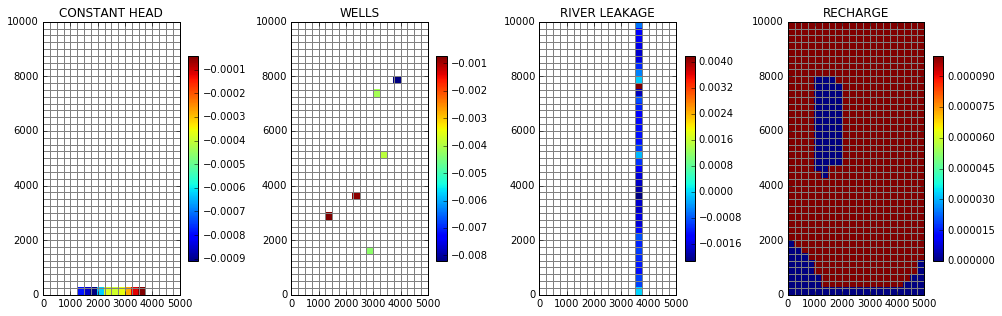

In [19]:
nam_f = r'..\data\freyberg\freyberg.nam'
ml = flopy.modflow.Modflow.load(nam_f, check=False)

names = zb.get_ssst_names()
zbud_arrays = [zb.get_ssst_cbc_array(name, kstpkper=(0, 0)) for name in names]
fig = plt.figure(figsize=(14, 6))

for idx, name in enumerate(names):
    zbud = zbud_arrays[idx][0, :, :]
    ax = fig.add_subplot(1, len(names), idx+1, aspect='equal')
    ax.set_title(name)
    modelmap = flopy.plot.ModelMap(model=ml)
    modelmap.plot_grid()
    quadmesh = modelmap.plot_array(zbud)
    cbar = fig.colorbar(quadmesh, shrink=.5)

plt.tight_layout()
plt.show()